In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
data=pd.DataFrame({"experiance":[2,1,5,3,6,7,8,4,9,10],
                  "age":[23,22,26,23,27,29,31,24,33,35],
                  "salary":[300,150,500,400,550,700,800,350,900,1000]})
data

,experiance,age,salary
0,2,23,300
1,1,22,150
2,5,26,500
3,3,23,400
4,6,27,550
5,7,29,700
6,8,31,800
7,4,24,350
8,9,33,900
9,10,35,1000


# Simple Linear Regression

In [5]:
real_x=data.iloc[:,0].values
real_y=data.iloc[:,2].values
real_x=real_x.reshape(-1,1)
real_y=real_y.reshape(-1,1)

In [6]:
training_x,testing_x,training_y,testing_y=train_test_split(real_x,real_y,test_size=0.3,random_state=0)

In [7]:
Lin =LinearRegression()
Lin.fit(training_x,training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
pred_y=Lin.predict(testing_x)

In [9]:
testing_y[0]

array([500], dtype=int64)

In [10]:
pred_y[0]

array([528.57142857])

In [11]:
print(metrics.mean_absolute_error(testing_y,pred_y))

35.74929971988794


In [12]:
print(metrics.mean_squared_error(testing_y,pred_y))

1890.8188275310133


In [13]:
print(np.sqrt(metrics.mean_squared_error(testing_y,pred_y)))

43.48354663008772


In [14]:
Lin.coef_

array([[90.44117647]])

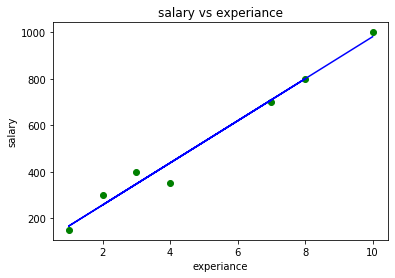

In [15]:
plt.scatter(training_x,training_y,color='green')
plt.plot(training_x,Lin.predict(training_x),color='blue')
plt.title("salary vs experiance")
plt.xlabel("experiance")
plt.ylabel("salary")
plt.show()

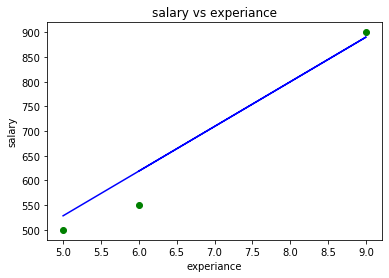

In [16]:
plt.scatter(testing_x,testing_y,color='green')
plt.plot(testing_x,Lin.predict(testing_x),color='blue')
plt.title("salary vs experiance")
plt.xlabel("experiance")
plt.ylabel("salary")
plt.show()

# Multiple Linear Regression

In [17]:
real_x=data.iloc[:,0:2].values
real_y=data.iloc[:,2].values

In [18]:
training_x,testing_x,training_y,testing_y=train_test_split(real_x,real_y,test_size=0.2,random_state=0)

In [19]:
MultiLin =LinearRegression()
MultiLin.fit(training_x,training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
pred_y=MultiLin.predict(testing_x)

In [21]:
testing_y[0]

500

In [22]:
pred_y[0]

504.8179271708684

In [23]:
print(metrics.mean_absolute_error(testing_y,pred_y))

4.348739495798327


In [24]:
print(metrics.mean_squared_error(testing_y,pred_y))

19.131672276753964


In [25]:
print(np.sqrt(metrics.mean_squared_error(testing_y,pred_y)))

4.373976711958348


In [26]:
MultiLin.coef_

array([51.03641457, 26.73669468])

# 3D visualization of Multiple Linear Regression 

In [27]:
x_surf, y_surf = np.meshgrid(np.linspace(data.experiance.min(), data.experiance.max(),2),
                             np.linspace(data.age.min(), data.age.max(),5))

real_y = pd.DataFrame({'salary': x_surf.ravel(), 'salary': y_surf.ravel()})
fittedY=MultiLin.predict(real_x)


In [28]:
## convert the predicted result in an array
fittedY=np.array(fittedY)
fittedY

array([ 271.49859944,  193.7254902 ,  504.81792717,  322.53501401,
        582.59103641,  687.10084034,  791.61064426,  400.30812325,
        896.12044818, 1000.6302521 ])

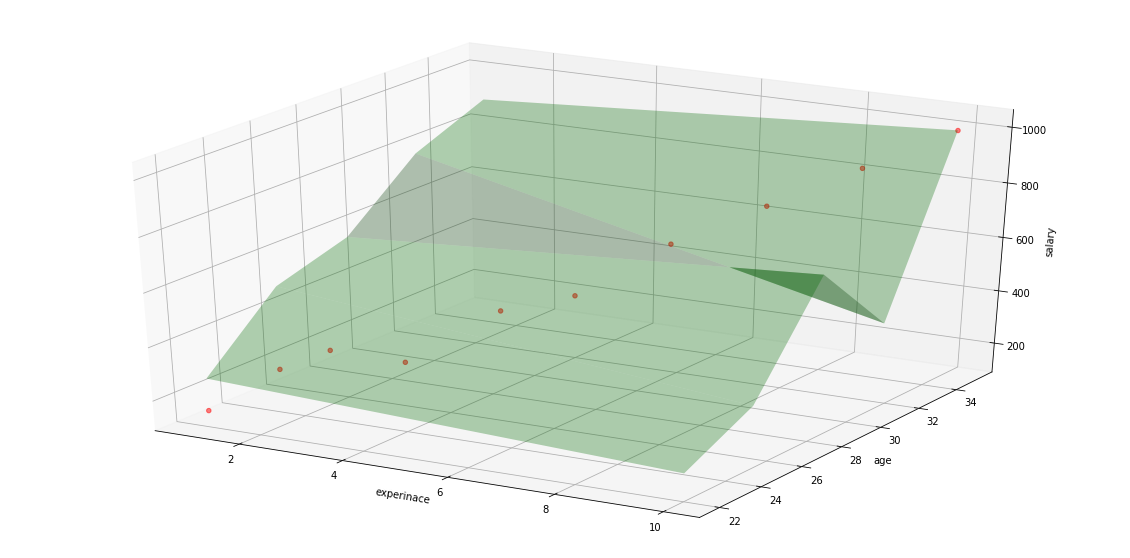

In [29]:
# Visualize the Data for Multiple Linear Regression
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['experiance'],data['age'],data['salary'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='green', alpha=0.3)
ax.set_xlabel('experinace')
ax.set_ylabel('age')
ax.set_zlabel('salary')
plt.show()
